In [1]:
import pandas as pd
df = pd.read_csv('COCO_640.csv')

In [2]:
df.head()

,nose_x,nose_y,nose_v,left_eye_x,left_eye_y,left_eye_v,right_eye_x,right_eye_y,right_eye_v,left_ear_x,...,right_knee_x,right_knee_y,right_knee_v,left_ankle_x,left_ankle_y,left_ankle_v,right_ankle_x,right_ankle_y,right_ankle_v,image_path
0,352,80,2,380,58,2,306,64,2,463,...,148,356,2,454,587,2,204,458,2,COCO/aug-train2017/000000528962.jpg
1,305,77,2,334,61,2,265,61,2,384,...,216,443,2,413,601,2,187,597,2,COCO/aug-train2017/000000085316.jpg
2,350,65,2,380,56,2,310,53,2,450,...,280,446,1,400,571,2,120,577,2,COCO/aug-train2017/000000057703.jpg
3,372,63,2,426,49,2,337,47,2,481,...,208,337,2,332,687,1,109,515,2,COCO/aug-train2017/000000515289.jpg
4,354,137,2,381,113,2,313,109,2,428,...,219,704,1,406,851,1,227,884,1,COCO/aug-train2017/000000022816.jpg


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
%matplotlib inline

In [4]:
def stringToImage(string):
    img = Image.open(string)
    return img

def plotFaces(nrows=5, ncols=5):
    selection = np.random.choice(df.index, size=(nrows*ncols), replace=False)
    image_strings = df.loc[selection]['image_path']
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for string, ax in zip(image_strings, axes.ravel()):
        ax.imshow(stringToImage(string), cmap='gray')
        ax.axis('off')

In [5]:
keypoint_cols = list(df.columns)[:-1]
xy = df.iloc[0][keypoint_cols].values.reshape((17, 3))

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x640 at 0x1F38FE3EF08>


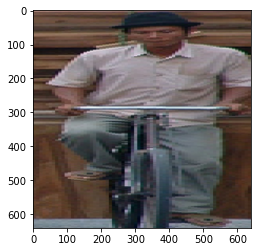

In [6]:
print(stringToImage(df.iloc[0]['image_path']))
plt.imshow(stringToImage(df.iloc[0]['image_path']), cmap='gray')


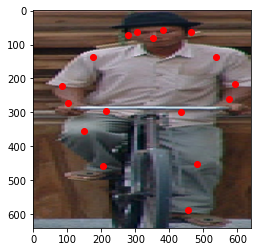

In [7]:
plt.plot(xy[:, 0], xy[:, 1], 'ro')
plt.imshow(stringToImage(df.iloc[0]['image_path']), cmap='gray')

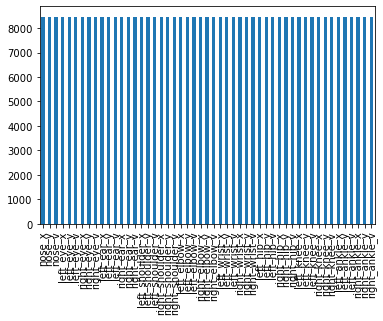

In [8]:
df.describe().loc['count'].plot.bar()

In [21]:
df.shape
df = df[:800]
df.shape

(800, 52)

In [22]:
X = np.stack([stringToImage(string) for string in df['image_path']]).astype(np.float)[:, :, :]

In [23]:
X.shape, X.dtype

((800, 640, 640, 3), dtype('float64'))

In [39]:
Y = np.vstack(df[df.columns[:-1]].values.astype(np.float))

In [25]:
Y.shape, Y.dtype

((800, 51), dtype('float64'))

In [26]:
x_train = X/255.

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

output_pipe = make_pipeline(
    MinMaxScaler(feature_range=(-1, 1))
)

y_train = output_pipe.fit_transform(Y)

In [35]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Activation, MaxPooling2D,Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import optimizers

In [36]:
x_train.reshape(y_train.shape[0],-1).shape

(800, 1228800)

In [ ]:
# model = Sequential()
# # model.add(BatchNormalization(input_shape=(112, 112, 3)))
# model.add(Conv2D(16, (9, 9), input_shape=(640, 640, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Dropout(0.5))
# model.add(Flatten())

# model.add(Dense(51))
# model.summary()

In [49]:
model = Sequential()
model.add(Dense(100, activation="relu", input_shape=(1228800,)))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(51))

sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               122880100 
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_7 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 51)                5151      
Total params: 122,885,251
Trainable params: 122,885,251
Non-trainable params: 0
_________________________________________________________________


In [50]:
# model = Sequential() 
# model.add(Conv2D(32, (2, 2), input_shape=(112, 112, 3)) )
# model.add(Activation('relu')) 
# model.add(MaxPooling2D(pool_size=(2, 2))) 
  
# model.add(Conv2D(32, (2, 2))) 
# model.add(Activation('relu')) 
# model.add(MaxPooling2D(pool_size=(2, 2))) 
  
# model.add(Conv2D(64, (2, 2))) 
# model.add(Activation('relu')) 
# model.add(MaxPooling2D(pool_size=(2, 2))) 
  
# model.add(Flatten()) 
# model.add(Dense(51)) 
# model.add(Activation('relu')) 
# model.add(Dropout(0.5)) 
# model.add(Dense(51)) 
# model.add(Activation('sigmoid')) 

In [ ]:
from keras import optimizers

# sgd = optimizers.SGD(lr=0.003, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
epochs = 50
history = model.fit(x_train.reshape(y_train.shape[0],-1), y_train, 
                 validation_split=0.2, shuffle=True, 
                 epochs=epochs)

Train on 640 samples, validate on 160 samples
Epoch 1/50
384/640 [=================>............] - ETA: 13s - loss: nan - accuracy: 0.0208

In [ ]:
model.save('model.h5')

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = tf.graph_util.convert_variables_to_constants(
            session, input_graph_def, output_names, freeze_var_names)
        return frozen_graph

In [ ]:
import os
os.sys.path